# **Analysing Data:** Assignment 2
*Liesa Albers (S3830381)*

---

## Preparation

To be able to run the code in this notebook, the required packages must be installed and imported. If you don't already have the packages below installed and imported, you can run these code blocks:

In [45]:
%%capture

# Install required packages
!pip install pandas scikit-learn seaborn matplotlib

In [177]:
# Import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy import stats
import seaborn as sns

## Load Data

In [48]:
data_file = 'data_full.csv'
df = pd.read_csv(data_file)

In [132]:
# Inspect data
df

,num,msttr,ari,fg,fe,words,comm
0,102,0.705500,6.2,3.7,86.50,1494,10
1,107,0.701875,6.2,4.8,83.76,3469,8
2,106,0.710899,9.2,7.3,77.16,7559,21
3,107,0.710899,9.2,7.3,77.16,7559,21
4,124,0.701765,9.8,6.7,78.89,1465,0
...,...,...,...,...,...,...,...
95,120,0.726429,9.7,8.7,73.61,1201,42
96,120,0.726429,9.7,8.7,73.61,2875,42
97,120,0.726429,9.7,8.7,73.61,1201,0
98,120,0.726429,9.7,8.7,73.61,2875,0


## Define Variables

In [75]:
# Independent variables and one dependent variable
independent_vars = ['ari', 'fg', 'fe', 'msttr', 'words', 'comm']
dependent_var = 'num'  # Assuming 'num' represents the success of the story in kudos

## Linear Regression

In [180]:
# Define function to combine all calculations/plots
def analyse_variable(independent_var):
    
    # Prepare variables
    X = df[[independent_var]]  # 2D array (DataFrame)
    y = df[dependent_var]  # 1D array (Series)

    # Create and fit model Simple Linear Regression
    model = LinearRegression()
    model.fit(X, y)
    
    # Predictions
    y_pred = model.predict(X)

    # Create scatterplot + regression line
    plt.scatter(X, y, alpha=0.35, label='Predicted vs Actual')
    plt.plot(X, y_pred, color='black')   
    plt.title(f'Plot of Linear Regression Test Values, Predicted vs. Actual for {independent_var}')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.subplots_adjust(top=0.85)
    plt.show()
    
    # Calculate R^2 score
    r2 = r2_score(y, y_pred)

    # Calculate residuals
    residuals = y - y_pred

    # Plot residuals
    sns.histplot(residuals)
    plt.title(f'Histogram of Linear Regression Residuals for {independent_var}')
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.show()

    # Shapiro-Wilk test
    shapiro_test = stats.shapiro(residuals)

    # Slope (= coefficients) and intercept
    slope = model.coef_[0]
    intercept = model.intercept_

    # Print results
    print(f'R^2 Score: {r2}')
    print(f'Slope: {slope}')
    print(f'Intercept: {intercept}')
    print(f'Shapiro-Wilk test for {independent_var}: Statistic={shapiro_test.statistic}, p-value={shapiro_test.pvalue}')



 Analysis ari vs Kudos:


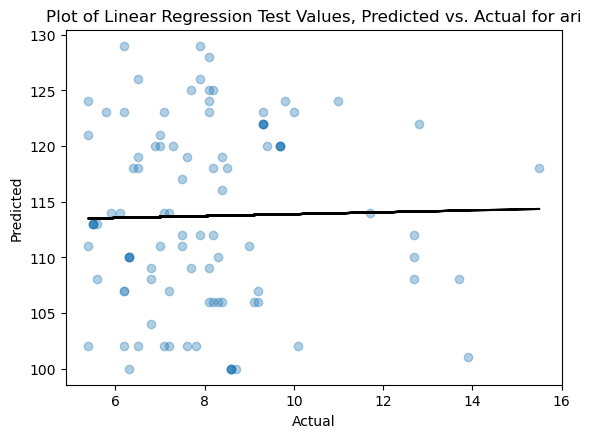

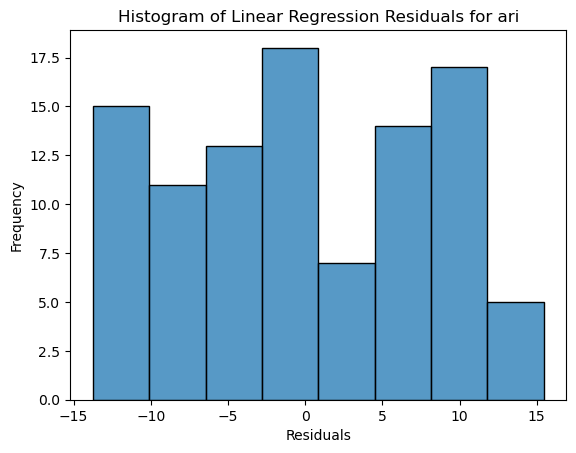

R^2 Score: 0.00045127723391991115
Slope: 0.08515663364330105
Intercept: 113.01602191857701
Shapiro-Wilk test for ari: Statistic=0.956145202889945, p-value=0.002155998454993444


 Analysis fg vs Kudos:


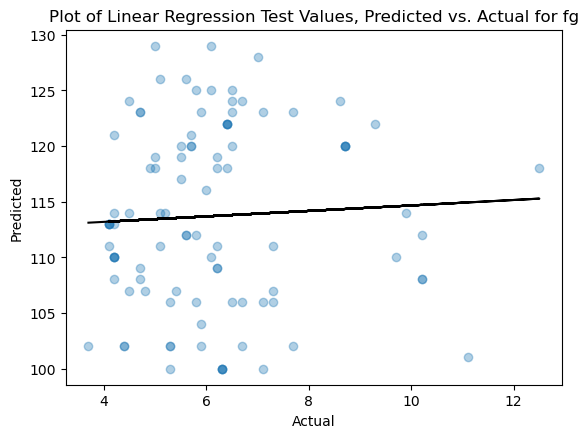

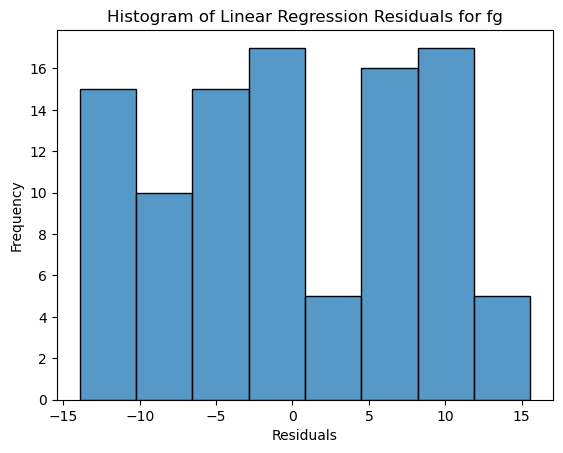

R^2 Score: 0.002699964285735601
Slope: 0.24561037497239765
Intercept: 112.19342595991931
Shapiro-Wilk test for fg: Statistic=0.95913662434005, p-value=0.003491444547801571


 Analysis fe vs Kudos:


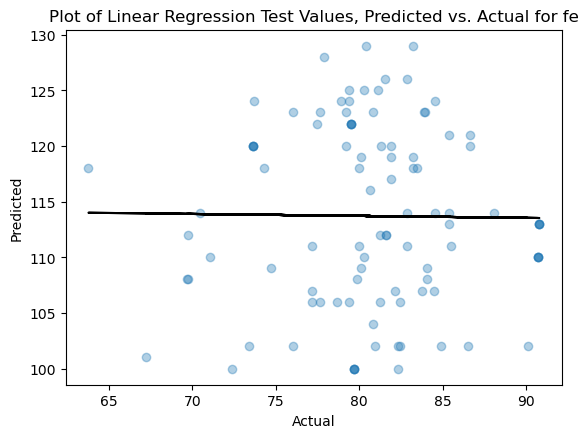

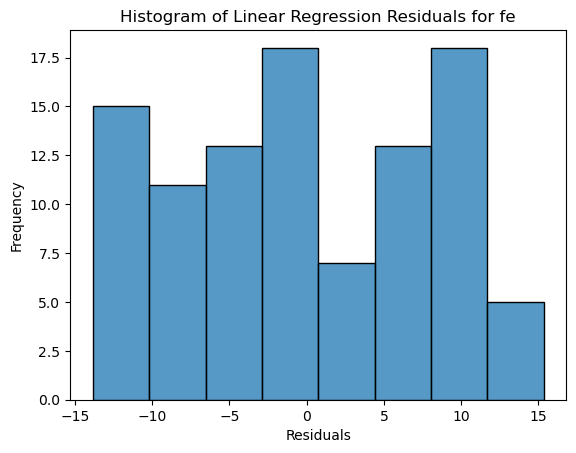

R^2 Score: 0.00013765768784101962
Slope: -0.0175592205167922
Intercept: 115.1164742243368
Shapiro-Wilk test for fe: Statistic=0.9553432649155007, p-value=0.001898293368478779


 Analysis msttr vs Kudos:


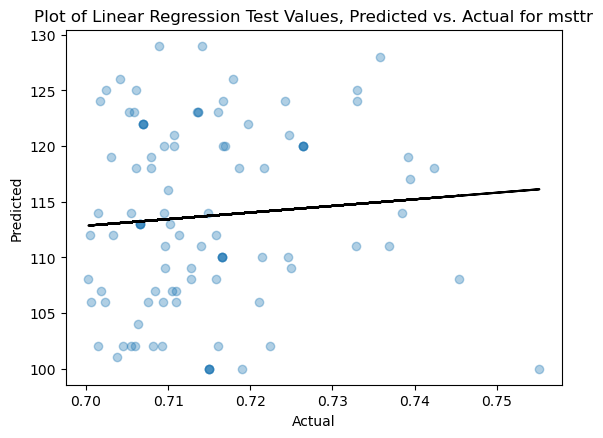

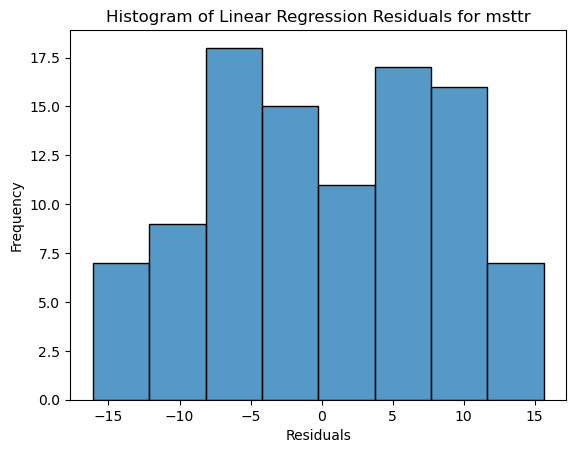

R^2 Score: 0.006513947674121057
Slope: 59.36489892099882
Intercept: 71.27204296247126
Shapiro-Wilk test for msttr: Statistic=0.9642034353164877, p-value=0.008108697254594366


 Analysis words vs Kudos:


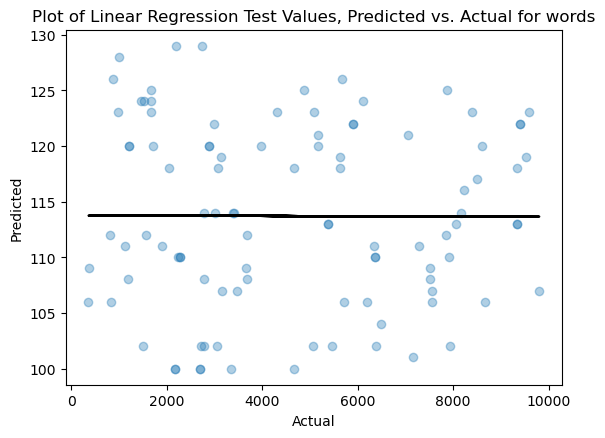

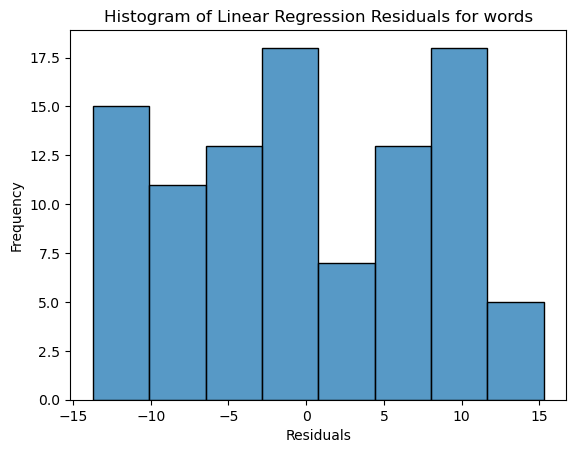

R^2 Score: 9.74737582848384e-06
Slope: -9.300064842491129e-06
Intercept: 113.74308059736923
Shapiro-Wilk test for words: Statistic=0.953877372975073, p-value=0.0015073437094967365


 Analysis comm vs Kudos:


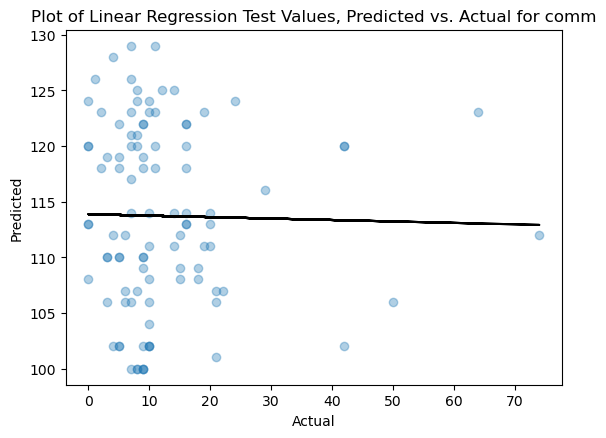

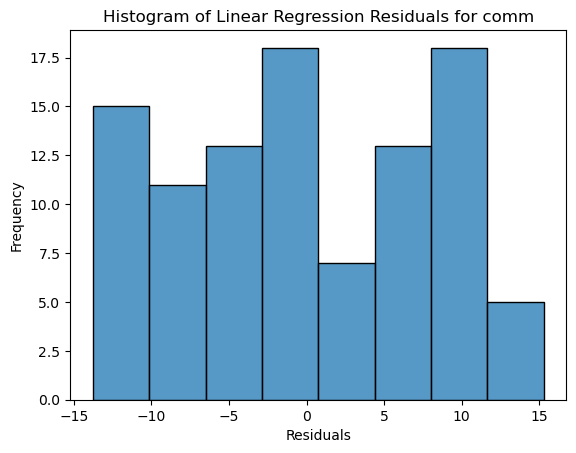

R^2 Score: 0.00036979225269739846
Slope: -0.012928031219105799
Intercept: 113.8604368674291
Shapiro-Wilk test for comm: Statistic=0.954784278996514, p-value=0.0017379414425814264


In [182]:
# Call the function for each independent variable
for var in independent_vars:
    print(f"\n\n Analysis {var} vs Kudos:")
    analyse_variable(var)